# Project: Investigate a Dataset (no_show_appointments_kagglev2_may_2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>**Description of Selected Dataset**
>
> The dataset (*no_show_appointments_kagglev2_may_2016.csv*) provides information on patients attendance to their scheduled medical appointments at various hospitals in Brazil. It provides information on various conditions of patients, and services such as scholarship and sms available to them prior to the appointment date. The analyses on this dataset would investigate whether all patients honoured their bookings or missed their appointment, and explore the conditions and services that might have influenced the attitude of patients towards showing up for their own scheduled appointment. 
>
>

>**Description of Features**
>
>**PatientId**: Identification of a patient 
>
>**AppointmentID**: Identification of a patient's appointment
>
>**Gender**: Male or Female status of a patient
>
>**ScheduledDay**: The day an appointment was booked
>
>**AppointmentDay**: The day a patient was to show up for their appointment
>
>**Age**: How old a patient is
>
>**Neighbourhood**: The location of a hospital
>
>**Scholarship**: A Brazillian welfare program Bolsa Familia also available to patients.
>
>> It is coded as **1** for patients benefiting from it, and **0** for patients who are not benefiting from it 
>
>**Hipertension**: A health condition of a patient.
>> Coded **1** for patients with the condition, and **0** for patients without the condition
>
>**Diabetes**: A health condition of a patient.
>> Coded **1** for patients with the condition, and **0** for patients without the condition
>
>**Handcap**: Patients with the handcap health condition.
>
>**Alcoholism**: Patients who have health issues due to consumption of alcohol.
>> Coded **1** for patients with health issues resulting from indulgence with alcohol, and **0** for patients free of any health issues associated with alcohol consumption
>
>**SMS_received**: Patients who were sent either 1 or more messages.
>> Coded **1** for patients who received sms, and **0** for patients who did not receive any sms message(s)
>
>**No-show**: Patients who either turned up for their scheduled appointment or did not.
>> Coded **No** for the patients who showed up for their scheduled appointment and, **Yes** for the patients who missed their scheduled appointment.
>

>**Research Questions**
>
>1: Generally, how many patients either showed up or did not show up for their scheduled appointment?
>
>2: How did scholarship influence the attitude of the patients to either show up for their scheduled appointments or otherwise?
>
>3: How did sms influence the attitude of the patients to either show up for their scheduled appointments or otherwise?
>
>4: What age group of patients are more luckly to show up for their scheduled appointment?
>
>5: Which gender shows up more for its scheduled appointment?
>
>6: In which month was the turn up to scheduled appointment the highest?
>
>7: Which of the four health conditions accounted for the highest and which accounted for the lowest showing up for scheduled appointment? 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

### General Properties

##### Loading the data

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointment_kaggle2_may_2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### Showing the last 5 rows

In [3]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


##### Finding the number of columns and rows in the dataset

In [4]:
df.shape

(110527, 14)

In [5]:
df.index

RangeIndex(start=0, stop=110527, step=1)

In [6]:
for column in df.columns:
    print(column)

PatientId
AppointmentID
Gender
ScheduledDay
AppointmentDay
Age
Neighbourhood
Scholarship
Hipertension
Diabetes
Alcoholism
Handcap
SMS_received
No-show


##### Inspecting the datatypes of the variables

In [7]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

**Note**: The object datatype of the columns 'ScheduledDay' and 'AppointmentDay' would be changed to the appropriate datetime datatype

##### Finding the total number of null values in each column

In [8]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

##### Determining the number of duplicates in the dataset

In [9]:
sum(df.duplicated())

0

##### Number of unique values in each column of the dataframe

In [10]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

##### Determining the number of non-null values of each variable

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning

##### Renaming and changing column names to lower cases

Most of the columns have names which are a mix of lower and upper case characters, while one column has a hyphen (-) in between the column name. Changing them to lower cases and replacing the hyphen with an underscore ( _ ) will make working with the column names easier.

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace = True)
df.head(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


###### Changing the datatype of the columns "scheduledday" and "appointmentday" from object (string) to datetime

These two columns contain dates with time, however, their datatype is object. Changing them to the appropriate datatype make it possible to work with the data in those columns.

In [13]:
#changing scheduledday column first
df['scheduledday'] = pd.to_datetime(df['scheduledday']).dt.tz_localize(None)


#changing appointmentday column second
df['appointmentday'] = pd.to_datetime(df['appointmentday']).dt.tz_localize(None)

In [14]:
df.dtypes

patientid                float64
appointmentid              int64
gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no_show                   object
dtype: object

In [15]:
df.head(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


##### Creating a new column of the months of the appointments

The analyses would include knowing the effect of the months on the appointments

In [16]:
# Extraction of the month of appointment into a new column "month" from the 'appointmentday' column

df['month_of_appointment'] = df['appointmentday'].dt.month
df.head(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,month_of_appointment
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4


##### Deleting extraneous columns
>These columns **patientid**, **appointmentid**, **scheduledday**, **appointmentday** and **neighbourhood** are not necessary for my analyses

In [17]:
df.drop(columns = ['patientid', 'appointmentid', 'scheduledday', 'appointmentday', 'neighbourhood'], axis = 1, inplace = True)
df.head()

,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,month_of_appointment
0,F,62,0,1,0,0,0,0,No,4
1,M,56,0,0,0,0,0,0,No,4
2,F,62,0,0,0,0,0,0,No,4
3,F,8,0,0,0,0,0,0,No,4
4,F,56,0,1,1,0,0,0,No,4


In [18]:
df.shape

(110527, 10)

In [19]:
df.dtypes

gender                  object
age                      int64
scholarship              int64
hipertension             int64
diabetes                 int64
alcoholism               int64
handcap                  int64
sms_received             int64
no_show                 object
month_of_appointment     int64
dtype: object

##### Saving of my cleaned dataset for the Exploratory Data Analysis (EDA)

In [20]:
df.to_csv('no_show_appointment_cleaned.csv', index = False)

### 

<a id='eda'></a>
## Exploratory Data Analysis


In [21]:
data = pd.read_csv('no_show_appointment_cleaned.csv')
data.head(3)

,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,month_of_appointment
0,F,62,0,1,0,0,0,0,No,4
1,M,56,0,0,0,0,0,0,No,4
2,F,62,0,0,0,0,0,0,No,4


In [22]:
data.shape

(110527, 10)

### 

### Research Question 1: 
### Generally, how many patients either showed up or did not show up for their scheduled appointment?

In [23]:
data['no_show'].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

In [24]:
data['no_show'].value_counts(normalize = True).round(4)

No     0.7981
Yes    0.2019
Name: no_show, dtype: float64

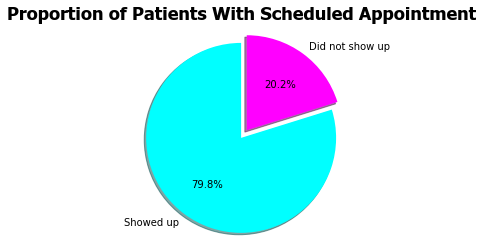

In [25]:
y = data['no_show'].value_counts(normalize = True).round(4)
mylabels = ['Showed up','Did not show up']
myexplode = [0.1, 0]
mycolors = ["cyan", "magenta"]

plt.pie(y, autopct='%1.1f%%', labels = mylabels, explode = myexplode, colors = mycolors, startangle = 90, shadow = True)

plt.axis('equal')

parameter={'axes.titlesize':18, 'axes.titleweight':'bold',}
plt.rcParams.update(parameter)
plt.title('Proportion of Patients With Scheduled Appointment', family='Tahoma', fontstyle='normal', color='k')

plt.show()

### 

## Functions to plot bar charts from Research Question 2 to Research Question 7

In [26]:
# A function that displays some plot information
def plot_info(data):
    """
    Display plot information
    """
    data.plot(kind='bar', color=['b','#800000'], figsize=(10,6), width=0.2)


# A function for the x-axis that displays the axis information in the plot
def x_info(x_title, font_details = {'family':'Times New Roman', 'fontsize':14, 'fontweight':'bold', 'color':'darkred'}):
    """
    Display x-axis information
    """
    plt.xlabel(x_title, font_details)

    
# A function for the y-axis that displays the axis information in the plot
def y_info(y_title, font_details = {'family': 'Times New Roman', 'fontsize':14, 'fontweight':'bold', 'color':'darkred'}):
    """
    Display y-axis information
    """
    plt.ylabel(y_title, font_details)

    
# A function that sets the parameters of the title
def title_para():
    """
    Set some parameters for the plot title
    """
    parameter={'axes.titlesize':18, 'axes.titleweight':'bold',}
    plt.rcParams.update(parameter)

    
# A function that displays the plot title information
def title_info(label, font_details = {'family':'Tahoma', 'fontstyle':'normal', 'color':'k'}):
    """
    Display plot title information
    """
    plt.title(label, font_details)

### 

### Research Question 2: 
### How did scholarship influence the attitude of the patients to either show up for their scheduled appointments or otherwise?

#### (i) Patients who either received a scholarship or did not receive

The analysis below is finding out the total number of patients who either had a scholarship or not

In [27]:
# The number of patients who received the scholarship and those who did not.
# Those who received are coded as 1
# Those who did not received are coded as 0

data1 = data['scholarship'].value_counts()
data1

0    99666
1    10861
Name: scholarship, dtype: int64

In [28]:
# The percent of patients who received the scholarship and those who did not

data['scholarship'].value_counts(normalize = True).round(4)

0    0.9017
1    0.0983
Name: scholarship, dtype: float64

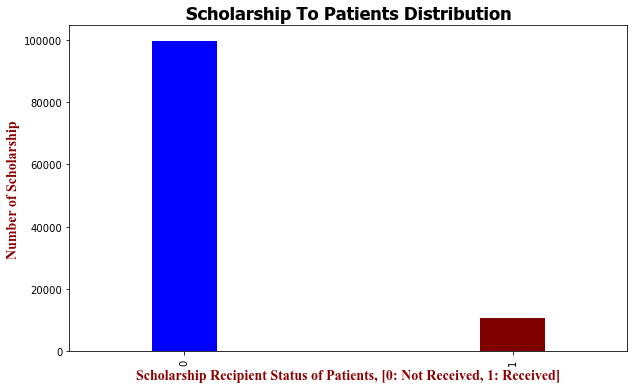

In [29]:
plot_info(data1)
x_info('Scholarship Recipient Status of Patients, [0: Not Received, 1: Received]')
y_info('Number of Scholarship') 
title_para()
title_info('Scholarship To Patients Distribution')

**Remarks** : Of the total 110527, appointments 10861 (9.83 %) had a scholarship and 99666 (90.17 %) did not have a scholarship 

#### (ii) Did either having a scholarship or not affect the number of patients showing up for their scheduled appointment?

In [30]:
data2 = data.groupby('scholarship')['no_show'].value_counts()
data2

scholarship  no_show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: no_show, dtype: int64

In [31]:
data.groupby('scholarship')['no_show'].value_counts(normalize = True).round(4)

scholarship  no_show
0            No         0.8019
             Yes        0.1981
1            No         0.7626
             Yes        0.2374
Name: no_show, dtype: float64

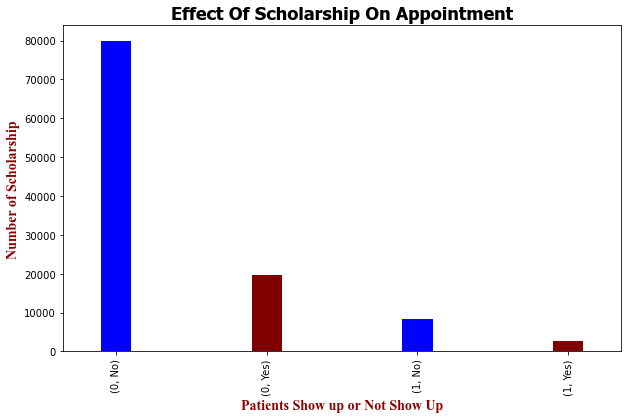

In [32]:
plot_info(data2)
x_info('Patients Show up or Not Show Up')
y_info('Number of Scholarship') 
title_para()
title_info('Effect Of Scholarship On Appointment')

**Remarks**:

(**a**) 10861 patients had a scholarship, however, 8283 (76.26%) showed up for their scheduled appointment, while 2578 (23.74 %) did not show up for their scheduled appointment eventhough they had a scholarship.

(**b**) 99666 patients did not have a scholarship for their scheduled appointment. However, 79925 (80.19 %) still showed up for their scheduled appointment while 19741 (19.81 %) did not.

Having a scholarship did not necessarily imply that patients were going to show up for their appointment, as over 23 % of those who had a scholarship did not still show up for their appointment as compared to 19.81 % of those who did not have a scholarship. 

There are over 88000 more patients who did not have a scholarship than those who had. That not withstanding more than 80 % of the total number of 99666 who did not have a scholarship turned up for their appointment, compared to 76 % of those who had a scholarship.


### 

### Research Question 3: 
### How did sms influence the attitude of the patients to either show up for their scheduled appointments or otherwise?

#### (i) Patients who either received a sms or did not receive

This analysis is finding out the total number of patients who either received a message(s) of their appointment or did not receive a sms.

In [33]:
# The number of patients who received sms and those who did not.
# Those who received are coded as 1
# Those who did not received are coded as 0

data3 = data['sms_received'].value_counts()
data3

0    75045
1    35482
Name: sms_received, dtype: int64

In [34]:
# The percent of patients who received sms and those who did not

data['sms_received'].value_counts(normalize = True).round(4)

0    0.679
1    0.321
Name: sms_received, dtype: float64

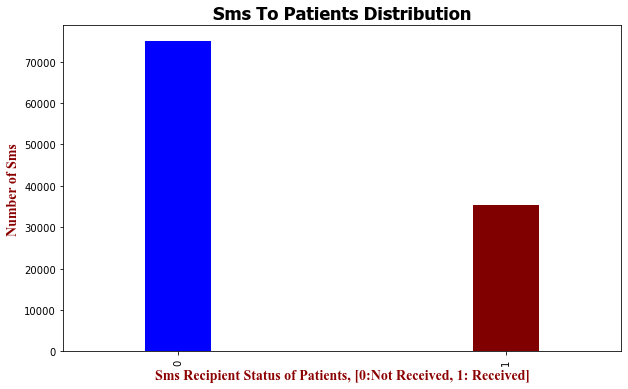

In [35]:
plot_info(data3)
x_info('Sms Recipient Status of Patients, [0:Not Received, 1: Received]')
y_info('Number of Sms') 
title_para()
title_info('Sms To Patients Distribution')

**Remarks** : Of the total 110527 appointments, 35482 (32.1 %) receive a sms while 75045 (67.9 %) did not receive a sms 

#### (ii) Did either receiving sms message(s) or not affect the number of patients who showed up for their scheduled appointment?

In [36]:
data4 = data.groupby('sms_received')['no_show'].value_counts()
data4

sms_received  no_show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: no_show, dtype: int64

In [37]:
data.groupby('sms_received')['no_show'].value_counts(normalize = True).round(4)

sms_received  no_show
0             No         0.8330
              Yes        0.1670
1             No         0.7243
              Yes        0.2757
Name: no_show, dtype: float64

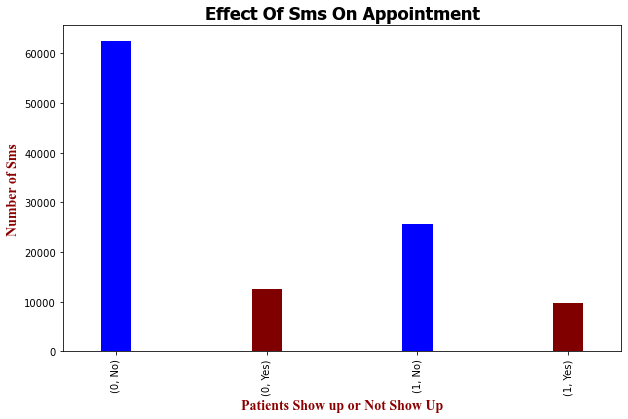

In [38]:
plot_info(data4)
x_info('Patients Show up or Not Show Up')
y_info('Number of Sms') 
title_para()
title_info('Effect Of Sms On Appointment')

**Remarks**: 

(**a**) Of the 35482 patients who received sms message(s), 25698 (72.43 %) showed up for their scheduled appointment, while 9784 (27.57 %) did not show up for their scheduled appointment eventhough they also received a sms.

(**b**) Of the 75045 patients who did not receive a sms, 62510 (83.30 %) showed up for their scheduled appointment, while 12535 (16.70 %) who did not receive a sms missed their scheduled appointment.

From the analysis, it is revealing that, receiving sms message(s) did not inspire or encourage patients to honour their appointment, as over 27.5 % of those to receive sms did not still show up for their appointment as compared to 16.70 % of those who did not get sms message(s). 

39563 more patients did not receive sms message(s) than those to get sms. Despite not receiving sms, 83.30 % of those who did not receive a sms still honoured their appointment as compared to 72.43 % of patients who got a sms. 

### 

   ###  Research Question 4:
   ### What age group of patients are more luckly to show up for their scheduled appointment?

In [39]:
data['age'].nunique()

104

In [40]:
data['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [41]:
# Calculating the average age of all patients

data['age'].mean()

37.08887421173107

#### (i) Number of older patients to show up or missed their scheduled appointment?

In [42]:
# Creating a dataframe of the patients older than the average age of all the patients

df_age_older = data[data['age'] > data['age'].mean()]
df_age_older.head()

,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,month_of_appointment
0,F,62,0,1,0,0,0,0,No,4
1,M,56,0,0,0,0,0,0,No,4
2,F,62,0,0,0,0,0,0,No,4
4,F,56,0,1,1,0,0,0,No,4
5,F,76,0,1,0,0,0,0,No,4


In [43]:
# Total number of patients older than the average age

df_age_older.shape

(54410, 10)

In [44]:
# Number of patients older than the average age of all the patients who either showed up for their appointment or missed

data5 = df_age_older['no_show'].value_counts()
data5

No     44852
Yes     9558
Name: no_show, dtype: int64

In [45]:
# Percent of patients older than the average age of all the patients who either showed up for their appointment or missed

df_age_older['no_show'].value_counts(normalize = True).round(4)

No     0.8243
Yes    0.1757
Name: no_show, dtype: float64

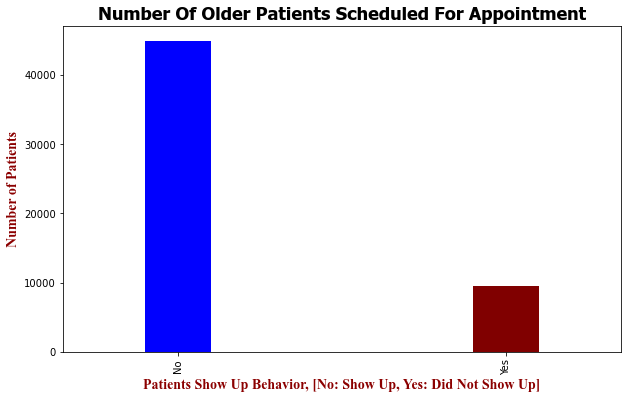

In [46]:
plot_info(data5)
x_info('Patients Show Up Behavior, [No: Show Up, Yes: Did Not Show Up]')
y_info('Number of Patients') 
title_para()
title_info('Number Of Older Patients Scheduled For Appointment')

#### (ii) Number of younger patients to show up or missed their scheduled appointment?

In [47]:
# Creating a dataframe of the patients younger than the average age of all the patients

df_age_younger = data[data['age'] <= data['age'].mean()]
df_age_younger.head()

,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,month_of_appointment
3,F,8,0,0,0,0,0,0,No,4
6,F,23,0,0,0,0,0,0,Yes,4
8,F,21,0,0,0,0,0,0,No,4
9,F,19,0,0,0,0,0,0,No,4
10,F,30,0,0,0,0,0,0,No,4


In [48]:
df_age_younger.shape

(56117, 10)

In [49]:
# Number of patients younger than the average age of all the patients who either showed up for their appointment or missed

data6 = df_age_younger['no_show'].value_counts()
data6

No     43356
Yes    12761
Name: no_show, dtype: int64

In [50]:
# Percent of patients younger than the average age of all the patients who either showed up for their appointment or missed

df_age_younger['no_show'].value_counts(normalize = True).round(4)

No     0.7726
Yes    0.2274
Name: no_show, dtype: float64

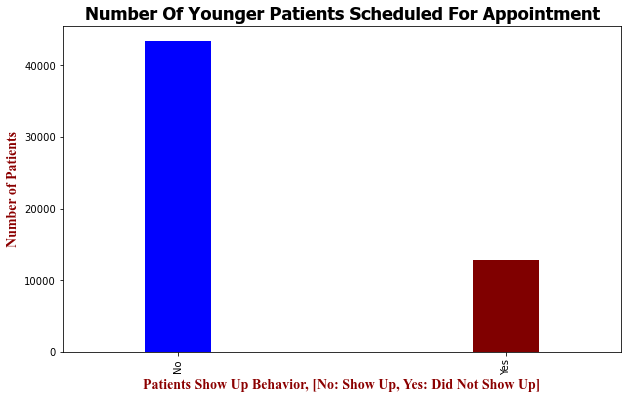

In [51]:
plot_info(data6)
x_info('Patients Show Up Behavior, [No: Show Up, Yes: Did Not Show Up]')
y_info('Number of Patients') 
title_para()
title_info('Number Of Younger Patients Scheduled For Appointment')

**Remarks**: 

The average age for all 110527 patients is 37.09.

(**i**) 54410 patients are older than the average age. 44852 (82.43 %) of these showed up for their appointment, and 9558 (17.57 %) older people could not turn up for their scheduled appointment.

(**ii**) 56117 patients are either younger than or have ages equal to the average age. 43356 (77.26 %) showed up for their appointment, while 12761 (22.74 %) missed their appointment.

The analyses reveal that, despite having more younger people scheduled for medical appointment, the older patients show up for their appointments than the younger ones. 

### 

   ###  Research Question 5:
   ### Which gender shows up more for its scheduled appointment?

In [52]:
# Number of male and female patients

data7 = data['gender'].value_counts()
data7

F    71840
M    38687
Name: gender, dtype: int64

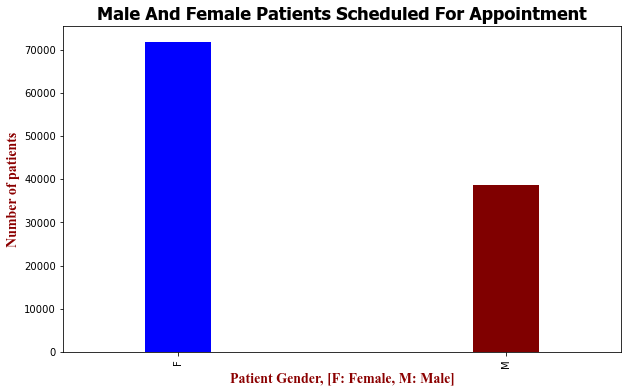

In [53]:
plot_info(data7)
x_info('Patient Gender, [F: Female, M: Male]')
y_info('Number of patients') 
title_para()
title_info('Male And Female Patients Scheduled For Appointment')

In [54]:
# Number of male and female patients showing up or otherwise to their scheduled appointment

data8 = data.groupby('gender')['no_show'].value_counts()
data8

gender  no_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: no_show, dtype: int64

In [55]:
# Percent of male and female patients showing up or otherwise to their scheduled appointment

data.groupby('gender')['no_show'].value_counts(normalize = True).round(4)

gender  no_show
F       No         0.7969
        Yes        0.2031
M       No         0.8003
        Yes        0.1997
Name: no_show, dtype: float64

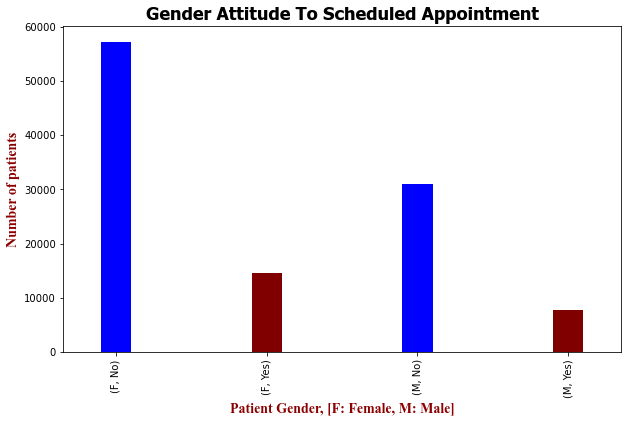

In [56]:
plot_info(data8)
x_info('Patient Gender, [F: Female, M: Male]')
y_info('Number of patients')
title_para()
title_info('Gender Attitude To Scheduled Appointment')

**Remarks**:

There are a total of 71840 females and 38687 males who were scheduled for medical appointment.

While 57246 (79.69 %) of the females showed up for their scheduled appointments, 14594 (20.31 %) did not show up. Even with the number of women who showed up for their appointment being more than all the men who were scheduled for appointment, only 30962 (80.03 %) of males showed up, while 7725 (19.97 %) did not show up.

Women scheduled more appointments than men. There are more females who still turned up for their scheduled appointments.

By the analysis, women are more luckily to honour their scheduled appointments.

### 

   ###  Research Question 6:
   ### In which month was the turn up to scheduled appointment the highest?

In [57]:
# Number of appointments in each of the three months

data9 = data.groupby('month_of_appointment')['no_show'].count()
data9

month_of_appointment
4     3235
5    80841
6    26451
Name: no_show, dtype: int64

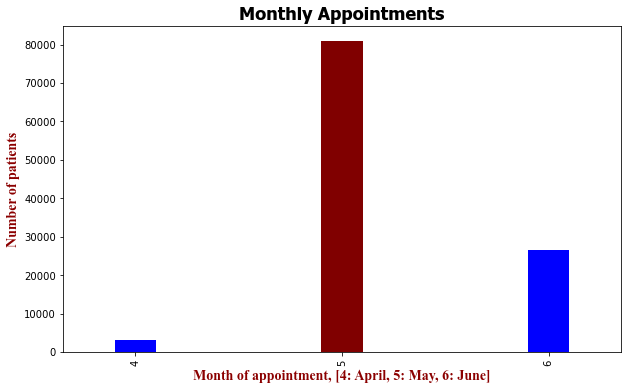

In [58]:
plot_info(data9)
x_info('Month of appointment, [4: April, 5: May, 6: June]')
y_info('Number of patients') 
title_para()
title_info('Monthly Appointments')

In [59]:
# Number hospital attendance in each of the three months

data10 = data.groupby('month_of_appointment')['no_show'].value_counts()
data10

month_of_appointment  no_show
4                     No          2602
                      Yes          633
5                     No         64037
                      Yes        16804
6                     No         21569
                      Yes         4882
Name: no_show, dtype: int64

In [60]:
# Percent of hospital attendance in each of the three months

data.groupby('month_of_appointment')['no_show'].value_counts(normalize = True).round(4)

month_of_appointment  no_show
4                     No         0.8043
                      Yes        0.1957
5                     No         0.7921
                      Yes        0.2079
6                     No         0.8154
                      Yes        0.1846
Name: no_show, dtype: float64

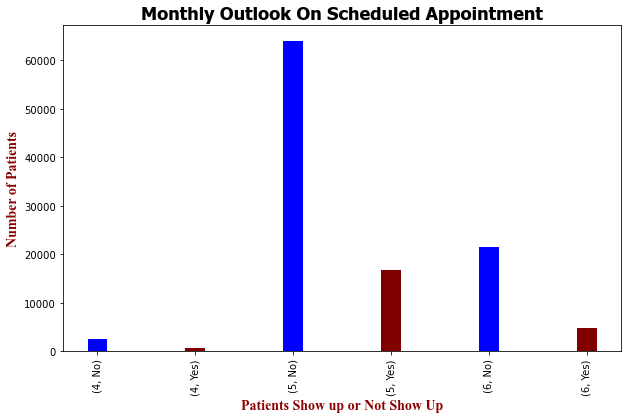

In [61]:
plot_info(data10)
x_info('Patients Show up or Not Show Up')
y_info('Number of Patients') 
title_para()
title_info('Monthly Outlook On Scheduled Appointment')

**Remarks**:

There were three months for the appointments during which patients either showed up or missed their scheduled appointments.
These months are April, May and June (4, 5, 6).

The month of May had the highest number of patients with appointment, while April had the least. 3235, 80841 and 26451 patients were respectively scheduled for April, May and June.

Of these appointments, May also recorded the highest number of patients who showed up for their appointment 64037 (79.21 % of those scheduled for May), and April also had the least number of patients to show up for their scheduled appointment 2602 (80.43 % of all patients scheduled for appointment in April). 
The month of May also recorded the highest number (16804) of patients to not show up for their appointment, and April again recorded the least number (633) of patients to miss their appointments.

### 

   ###  Research Question 7:
   ### For patients who suffered from any of the four sicknesses, of which of them did more patients show up for their appointment, and of which them did the least number of patients show up for their scheduled appointment? 

###### 

In [62]:
data.head(1)

,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,month_of_appointment
0,F,62,0,1,0,0,0,0,No,4


####  (i) Hipertension health condition

In [63]:
# Number of patients who are hipertensive and those who are not

data11 = data['hipertension'].value_counts()
data11

0    88726
1    21801
Name: hipertension, dtype: int64

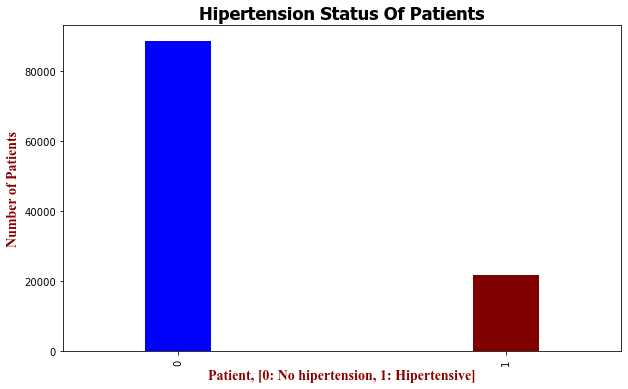

In [64]:
plot_info(data11)
x_info('Patient, [0: No hipertension, 1: Hipertensive]')
y_info('Number of Patients') 
title_para()
title_info('Hipertension Status Of Patients')

In [65]:
# Patients who are hipertensive and those who are not, and who either showed up or missed their scheduled appointments

data12 = data.groupby('hipertension')['no_show'].value_counts()
data12

hipertension  no_show
0             No         70179
              Yes        18547
1             No         18029
              Yes         3772
Name: no_show, dtype: int64

In [66]:
# Percent of patients who are hipertensive and those who are not, and who either showed up or missed their scheduled appointments


data.groupby('hipertension')['no_show'].value_counts(normalize = True).round(4)

hipertension  no_show
0             No         0.791
              Yes        0.209
1             No         0.827
              Yes        0.173
Name: no_show, dtype: float64

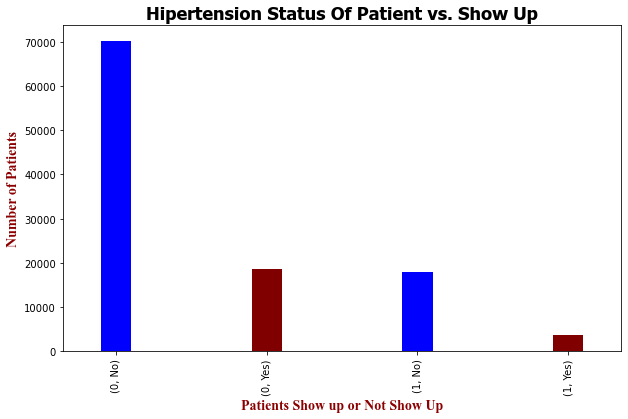

In [67]:
plot_info(data12)
x_info('Patients Show up or Not Show Up')
y_info('Number of Patients') 
title_para()
title_info('Hipertension Status Of Patient vs. Show Up')

**Remarks**

21801 patients were hipertensive. Of these 18029 (82.7 %) showed up for their appointment while 3772 (17.3 %) did not. Of the 88726 patients who were not hipertensive, 70179 (79.1 %) showed up for their appointment while 18547 (17.3 %) missed their appointment.

More non-hipertensive patients showed up than hipertensive patients.

### 

#### (ii) Diabetes

In [68]:
# Number of patients who have diabetes and those who do not.

data13 = data['diabetes'].value_counts()
data13

0    102584
1      7943
Name: diabetes, dtype: int64

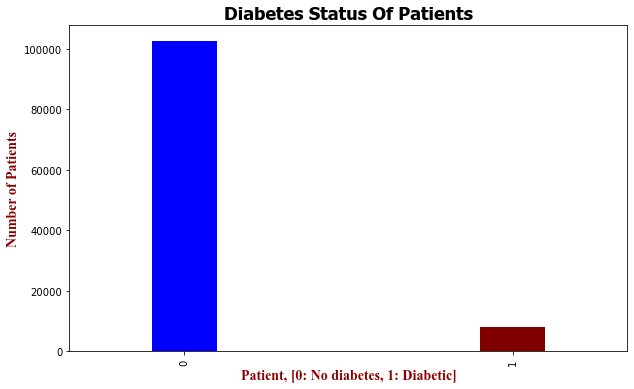

In [69]:
plot_info(data13)
x_info('Patient, [0: No diabetes, 1: Diabetic]')
y_info('Number of Patients') 
title_para()
title_info('Diabetes Status Of Patients')

In [70]:
# Patients who have diabetes and those who do not, and who either showed up or missed their scheduled appointments


data14 = data.groupby('diabetes')['no_show'].value_counts()
data14

diabetes  no_show
0         No         81695
          Yes        20889
1         No          6513
          Yes         1430
Name: no_show, dtype: int64

In [71]:
# Percent of patients who are diabetic and those who are not, and who either showed up or missed their scheduled appointments


data.groupby('diabetes')['no_show'].value_counts(normalize = True).round(4)

diabetes  no_show
0         No         0.7964
          Yes        0.2036
1         No         0.8200
          Yes        0.1800
Name: no_show, dtype: float64

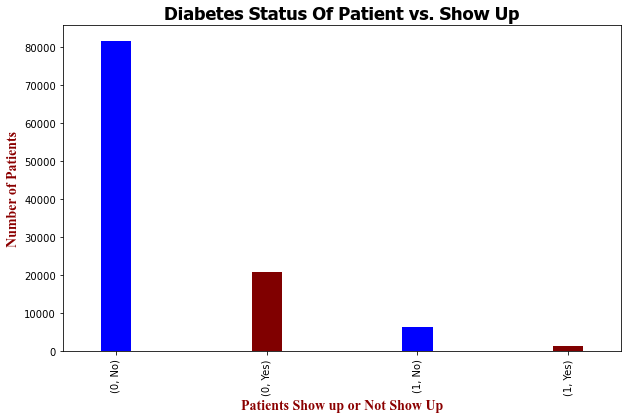

In [72]:
plot_info(data14)
x_info('Patients Show up or Not Show Up')
y_info('Number of Patients') 
title_para()
title_info('Diabetes Status Of Patient vs. Show Up')

**Remarks**        
          
102584 patients were not diabetic, while 7943 were. Of those who were not 81695 (79.64 %) showed up for their appointment while 20889 (20.36 %) did not. Of the 7943 patients who were diabetic, 6513 (82.0 %) showed up for their appointment while 1430 (18.0 %) missed their appointment.

Patients without the diabetic condition were more than all the patients who had the condition, and majority of them still showed up for their appointment 

### 

#### (iii) Alcoholism

In [73]:
# Number of patients with an alcoholism condition and those without.

data15 = data['alcoholism'].value_counts()
data15

0    107167
1      3360
Name: alcoholism, dtype: int64

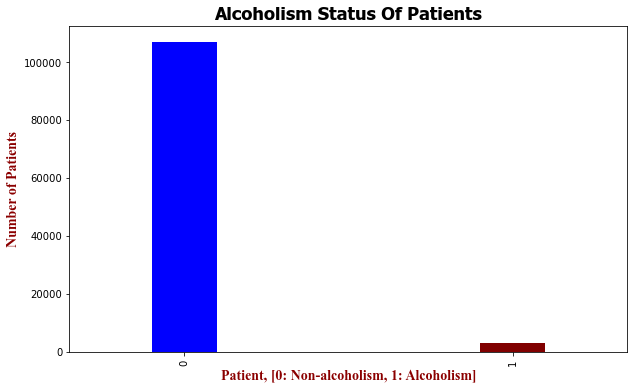

In [74]:
plot_info(data15)
x_info('Patient, [0: Non-alcoholism, 1: Alcoholism]')
y_info('Number of Patients')
title_para()
title_info('Alcoholism Status Of Patients')

In [75]:
# Patients with an alcoholism condition and those without, and who either showed up or missed their scheduled appointments


data16 = data.groupby('alcoholism')['no_show'].value_counts()
data16

alcoholism  no_show
0           No         85525
            Yes        21642
1           No          2683
            Yes          677
Name: no_show, dtype: int64

In [76]:
# Percent of patients with an alcoholism condition and those without, and who either showed up or missed their scheduled appointments


data.groupby('alcoholism')['no_show'].value_counts(normalize = True).round(4)

alcoholism  no_show
0           No         0.7981
            Yes        0.2019
1           No         0.7985
            Yes        0.2015
Name: no_show, dtype: float64

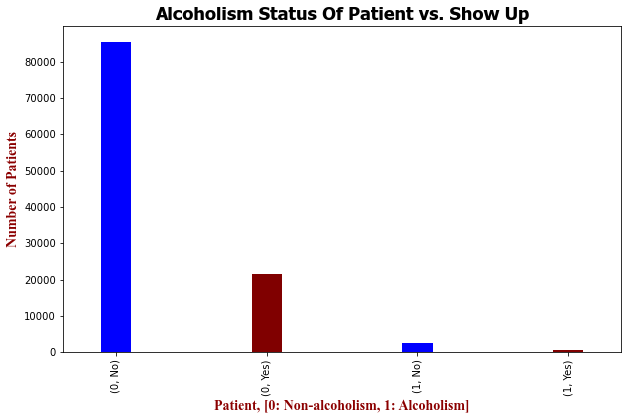

In [77]:
plot_info(data16)
x_info('Patient, [0: Non-alcoholism, 1: Alcoholism]')
y_info('Number of Patients')
title_para()
title_info('Alcoholism Status Of Patient vs. Show Up')

**Remarks**        

107167 patients did not have health conditions associated with alcoholism and 3360 patients did. Of those who did, 2683 (79.85 %) did show up for their scheduled appointment, while 677 (20.15 %) missed their schedule. 85525 (79.81 %) of those without alcoholism conditions made it to their appointment and 21642 (20.19 %) did not.



### 

#### (iv) Handcap

In [78]:
# Patients who had handcap and those who did not

data17 = data['handcap'].value_counts()
data17

0    108286
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

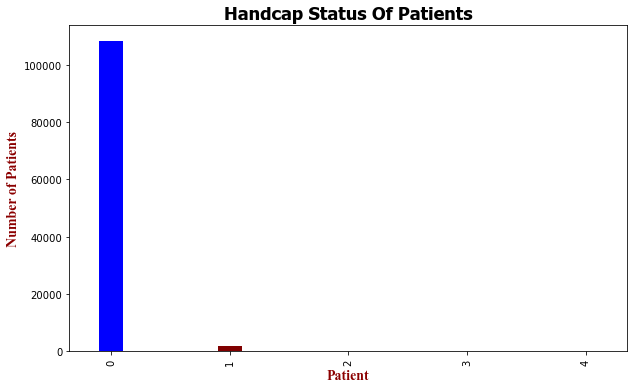

In [79]:
plot_info(data17)
x_info('Patient')
y_info('Number of Patients') 
title_para()
title_info('Handcap Status Of Patients')

In [80]:
# Patients who had handcap and those who did not, and who either showed up or missed their scheduled appointments


data18 = data.groupby('handcap')['no_show'].value_counts()
data18

handcap  no_show
0        No         86374
         Yes        21912
1        No          1676
         Yes          366
2        No           146
         Yes           37
3        No            10
         Yes            3
4        No             2
         Yes            1
Name: no_show, dtype: int64

In [81]:
# Percent of patients who had handcap and those who did not, and who either showed up or missed their scheduled appointments


data.groupby('handcap')['no_show'].value_counts(normalize = True).round(4)

handcap  no_show
0        No         0.7976
         Yes        0.2024
1        No         0.8208
         Yes        0.1792
2        No         0.7978
         Yes        0.2022
3        No         0.7692
         Yes        0.2308
4        No         0.6667
         Yes        0.3333
Name: no_show, dtype: float64

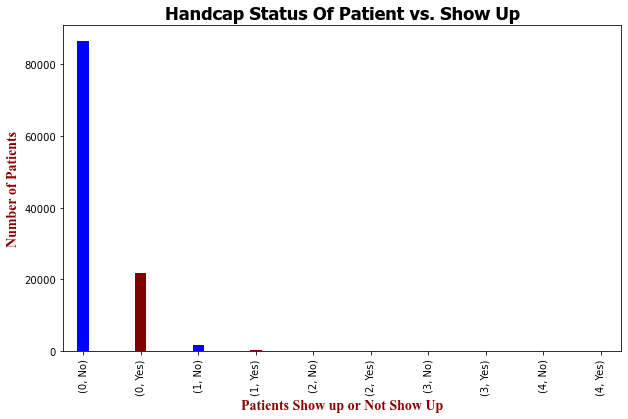

In [82]:
plot_info(data18)
x_info('Patients Show up or Not Show Up')
y_info('Number of Patients') 
title_para()
title_info('Handcap Status Of Patient vs. Show Up')

**Remarks**

The patients who did not have handcap outnumbered those who had, and also showed up more for their appointment.

### 

In [83]:
# Basic statistics of the clean data

data.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,month_of_appointment
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,5.210048
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.473780
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.000000


<a id='conclusions'></a>
## Conclusions

1. About 80 % of all patients showed up for their scheduled appointments.

2. Patients without scholarship showed up for their scheduled appointment than those who had scholarship. 

3. Majority of patients showed up their appointments even if they did receive sms message (s).

4. Older patients turn to show up for their appointments than the younger ones.

5. Mostly females show up for their scheduled appointments than males.

6. More patients schedule and show up for their appointments in the month of May than they do in April and June.

7. Patients with hipertension showed up more for their scheduled appointment, while patients with handcap recorded the least number of patients who showed up for their appointments.  
>
>
**Limitation**
> Some of the age values were not valid (the minimum age was -1).


<a id='conclusions'></a>
## References
>
>

1. https://www.tutorialsandyou.com/matplotlib/how-to-show-percentage-and-value-in-matplotlib-pie-chart-12.html

2. https://matplotlib.org/stable/plot_types/stats/pie.html#sphx-glr-plot-types-stats-pie-py

3. https://www.w3schools.com/python/matplotlib_pie_charts.asp

4. https://matplotlib.org/stable/plot_types/basic/bar.html

5. https://www.w3schools.com/python/matplotlib_bars.asp